<a href="https://colab.research.google.com/github/p-in-g/Algov/blob/main/minipro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
!pip install kaggle
!pip install pandas numpy scikit-learn matplotlib seaborn nltk

In [ ]:
# Upload Kaggle API token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"p29goel","key":"c7592f49f9f81c57a3647cf56cbae000"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print(1)

1


In [ ]:
#uploading dataset
!kaggle datasets download -d petalme/student-anxiety-dataset

Dataset URL: https://www.kaggle.com/datasets/petalme/student-anxiety-dataset
License(s): apache-2.0
  0% 0.00/647k [00:00<?, ?B/s]
100% 647k/647k [00:00<00:00, 101MB/s]


In [ ]:
#extracting the zipfile
from zipfile import ZipFile
dataset = '/content/student-anxiety-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os
print(os.listdir())


['.config', 'student-anxiety-dataset.zip', 'anxiety.csv', 'kaggle.json', 'sample_data']


In [ ]:
!ls ~/.kaggle


kaggle.json


In [ ]:
import os

os.environ["KAGGLE_KERNEL_RUN_TYPE"] = "Interactive"
os.makedirs('/kaggle/', exist_ok=True)

if "KAGGLE_KERNEL_RUN_TYPE" in os.environ and os.path.exists('/kaggle/'):
    print("You are in a Kaggle environment (simulated).")
else:
    print("You are not in a Kaggle environment.")


You are in a Kaggle environment (simulated).


In [ ]:
import os

if "KAGGLE_KERNEL_RUN_TYPE" in os.environ and os.path.exists('/kaggle/'):
    print("You are in a Kaggle environment.")
else:
    print("You are not in a Kaggle environment.")


You are in a Kaggle environment.


In [ ]:
import os

for key, value in os.environ.items():
    print(f"{key}: {value}")


SHELL: /bin/bash
NV_LIBCUBLAS_VERSION: 12.2.5.6-1
NVIDIA_VISIBLE_DEVICES: all
COLAB_JUPYTER_TRANSPORT: ipc
NV_NVML_DEV_VERSION: 12.2.140-1
NV_CUDNN_PACKAGE_NAME: libcudnn8
CGROUP_MEMORY_EVENTS: /sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events
NV_LIBNCCL_DEV_PACKAGE: libnccl-dev=2.19.3-1+cuda12.2
NV_LIBNCCL_DEV_PACKAGE_VERSION: 2.19.3-1
VM_GCE_METADATA_HOST: 169.254.169.253
HOSTNAME: d3e5d8a38351
LANGUAGE: en_US
TBE_RUNTIME_ADDR: 172.28.0.1:8011
COLAB_TPU_1VM: 
GCE_METADATA_TIMEOUT: 3
NVIDIA_REQUIRE_CUDA: cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,driver<471 brand=tesla,driver>=525,driver<526 brand=unknown,driver>=525,driver<526 brand=

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Access your dataset
file_path = '/content/drive/My Drive/anxiety.csv'


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error ,confusion_matrix,accuracy_score
import string as st
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
print(1)

1


In [ ]:
# Reading the CSV file
df = pd.read_csv('/content/anxiety.csv'  , encoding = 'ISO-8859-1')

# Display the first few rows
print(df.head())


   S. No.    Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0       1  42052.00437     0     0     0     0     1     0     0   
1       2  42052.00680     1     2     2     2     0     1     0   
2       3  42052.03860     0     2     2     0     0     3     1   
3       4  42052.06804     0     0     0     0     0     0     0   
4       5  42052.08948     2     1     2     2     2     3     2   

                   GADE  ...  Birthplace    Residence  Reference  \
0  Not difficult at all  ...         USA          USA     Reddit   
1    Somewhat difficult  ...         USA          USA     Reddit   
2  Not difficult at all  ...     Germany      Germany     Reddit   
3  Not difficult at all  ...         USA          USA     Reddit   
4        Very difficult  ...         USA  South Korea     Reddit   

                                           Playstyle  accept GAD_T SWL_T  \
0                                       Singleplayer  Accept     1    23   
1              Multiplayer - o

In [ ]:
df.GAD2

,GAD2
0,0
1,2
2,2
3,0
4,1
...,...
13459,0
13460,3
13461,0
13462,2


In [ ]:
#overview of the dataframe
df.drop(['S. No.' , 'Timestamp'] , axis = 1 , inplace = True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GAD1,13464.0,0.860963,0.926542,0.0,0.0,1.0,1.0,3.0
GAD2,13464.0,0.673351,0.915724,0.0,0.0,0.0,1.0,3.0
GAD3,13464.0,0.965761,0.982776,0.0,0.0,1.0,2.0,3.0
GAD4,13464.0,0.724079,0.921971,0.0,0.0,0.0,1.0,3.0
GAD5,13464.0,0.488042,0.837014,0.0,0.0,0.0,1.0,3.0
GAD6,13464.0,0.911022,0.931168,0.0,0.0,1.0,1.0,3.0
GAD7,13464.0,0.588755,0.894408,0.0,0.0,0.0,1.0,3.0
SWL1,13464.0,3.720440,1.736264,1.0,2.0,4.0,5.0,7.0
SWL2,13464.0,4.602050,1.696276,1.0,3.0,5.0,6.0,7.0
SWL3,13464.0,4.345440,1.809430,1.0,3.0,5.0,6.0,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             12815 non-null  object 
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  object 
 14  Platform         13464 non-null  object 
 15  Hours            13434 non-null  float64
 16  earnings         13464 non-null  object 
 17  whyplay     

value analysis

In [ ]:
for i in df:
    print('-------------')
    print(df[i].value_counts().head(15))
    print('-------------')


-------------
GAD1
0    5694
1    5099
2    1520
3    1151
Name: count, dtype: int64
-------------
-------------
GAD2
0    7616
1    3576
2    1326
3     946
Name: count, dtype: int64
-------------
-------------
GAD3
0    5319
1    4708
2    2016
3    1421
Name: count, dtype: int64
-------------
-------------
GAD4
0    7129
1    3884
2    1488
3     963
Name: count, dtype: int64
-------------
-------------
GAD5
0    9236
1    2576
2     961
3     691
Name: count, dtype: int64
-------------
-------------
GAD6
0    5386
1    4993
2    1982
3    1103
Name: count, dtype: int64
-------------
-------------
GAD7
0    8444
1    2961
2    1211
3     848
Name: count, dtype: int64
-------------
-------------
GADE
Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: count, dtype: int64
-------------
-------------
SWL1
2    3043
5    2727
6    2218
3    2099
4    1625
1    1333
7     419
Name: count, dtype: int64
-------------
---

In [ ]:
for i in df:
    print('------',i,'------')
    print(df[i].unique()[:30])
    print('-------------')


------ GAD1 ------
[0 1 2 3]
-------------
------ GAD2 ------
[0 2 1 3]
-------------
------ GAD3 ------
[0 2 3 1]
-------------
------ GAD4 ------
[0 2 3 1]
-------------
------ GAD5 ------
[1 0 2 3]
-------------
------ GAD6 ------
[0 1 3 2]
-------------
------ GAD7 ------
[0 1 2 3]
-------------
------ GADE ------
['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
-------------
------ SWL1 ------
[3 2 5 7 6 1 4]
-------------
------ SWL2 ------
[5 6 2 4 3 7 1]
-------------
------ SWL3 ------
[5 2 4 3 6 7 1]
-------------
------ SWL4 ------
[5 2 3 6 1 7 4]
-------------
------ SWL5 ------
[5 1 2 3 7 6 4]
-------------
------ Game ------
['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
-------------
------ Platform ------
['Console (PS, Xbox, ...)' 'PC' 'Smartphone / Tablet']
-------------
------ Hours ------
[15.  8.  0. 20.  4. 3

In [ ]:
for i in df:
    print('------',i,'------')
    print(df[i].nunique())
    print('-------------')


------ GAD1 ------
4
-------------
------ GAD2 ------
4
-------------
------ GAD3 ------
4
-------------
------ GAD4 ------
4
-------------
------ GAD5 ------
4
-------------
------ GAD6 ------
4
-------------
------ GAD7 ------
4
-------------
------ GADE ------
4
-------------
------ SWL1 ------
7
-------------
------ SWL2 ------
7
-------------
------ SWL3 ------
7
-------------
------ SWL4 ------
7
-------------
------ SWL5 ------
7
-------------
------ Game ------
11
-------------
------ Platform ------
3
-------------
------ Hours ------
84
-------------
------ earnings ------
314
-------------
------ whyplay ------
407
-------------
------ League ------
1454
-------------
------ highestleague ------
0
-------------
------ streams ------
65
-------------
------ SPIN1 ------
5
-------------
------ SPIN2 ------
5
-------------
------ SPIN3 ------
5
-------------
------ SPIN4 ------
5
-------------
------ SPIN5 ------
5
-------------
------ SPIN6 ------
5
-------------
------ SPIN7 

Cleaning the data

In [ ]:
df.shape

(13464, 53)

In [ ]:
# Create a new column 'Hours_streams'
df['Hours_streams'] = df['Hours'] + df['streams']

# Combine indices where the condition is met
drop_indices = df[df['Hours_streams'] > 115].index.union(df[df['Hours_streams'] == 0].index)

# Drop the rows with the combined indices
df.drop(index=drop_indices, axis=0, inplace=True)


In [ ]:
df.GADE.value_counts()


,count
GADE,
Not difficult at all,6218
Somewhat difficult,5780
Very difficult,1004
Extremely difficult,409


In [ ]:
df.GADE.fillna(df.GADE.value_counts().index[1] , inplace=True)
df.GADE.value_counts()

,count
GADE,
Not difficult at all,6218
Somewhat difficult,5780
Very difficult,1004
Extremely difficult,409


In [ ]:
df.shape


(13411, 54)

In [ ]:
df.streams.fillna(int(df.streams.mean()) , inplace = True)
df.Hours.fillna(int(df.Hours.mean()) , inplace = True)
df.drop('Hours_streams' , axis = 1 , inplace = True)
print(df.League.nunique())
df.League = df.League.str.lower().str.strip()
print(df.League.nunique())

1443
1199


In [ ]:
df["League"] =df["League"].str.extract(r'^([a-z]+)')
df.League.nunique()

207

In [ ]:
df.League.unique()

array([nan, 'gold', 'none', 'na', 'diamond', 'not', 'bronze', 'silver',
       'n', 'unranked', 'bad', 'legendary', 'global', 'potato', 'master',
       'silverii', 'platinum', 'masters', 'challenger', 'lvl', 'platin',
       'promos', 'top', 'd', 'plat', 'i', 'rank', 'grandmaster',
       'platnium', 's', 'haven', 'platinium', 'in', 'gv', 'provisional',
       'placements', 'g', 'was', 'the', 'division', 'pplatinum', 'hr',
       'only', 'platium', 'legend', 'platine', 'plarinum', 'dmg',
       'sliver', 'dont', 'high', 'very', 'starcraft', 'challenjour',
       'fusion', 'low', 'unraked', 'havent', 'got', 'golden', 'cs', 'p',
       'standard', 'still', 'highest', 'nope', 'dia', 'league', 'nova',
       'mge', 'silber', 'siver', 'never', 'b', 'platinun', 'mg',
       'supreme', 'for', 'greater', 'wood', 'le', 'no', 'natural', 'aram',
       'don', 'currently', 'noone', 'grand', 'hs', 'current', 'last',
       'first', 'recently', 'fucking', 'grandmasters', 'golf', 'of',
       'glod'

In [ ]:
df.loc[(df['whyplay']== 'having fun') ,'League'] =df.loc[(df['whyplay']== 'having fun') ,'League'].fillna('unranked')
df.League.fillna('gold' , inplace = True)
golds = ['g', 'gv', 'golden' ,'glod' ,'golld' ,'golf', 'goled', 'golderino' ,'giii']
df['League'] = df.League.replace(golds , 'gold')
silvers = [ 'silverii' , 's' , 'sliver' , 'siver' , 'silber' , 'sil' , 'silveriv']
df['League'] = df.League.replace(silvers , 'silver')
plats = [
    'platinium' , 'platnium' , 'platin' ,'pplatinum' ,'plarinum' ,'platium', 'p' ,'platine' ,
    'platinun' ,'platonum' ,'platnum', 'plata' ,'plantinum',
    'platinuim' ,'platunum', 'plantinum' ,'platunum' ,'platinumm' ,'platv' ,'platina' , 'plat' ]
df['League'] = df.League.replace(plats , 'platinum')
bronzers = ['bronce' , 'b' , 'broze' ,'lowest' , 'wood', 'elohell']
df['League'] = df.League.replace(bronzers , 'bronze')
plats = [
    'platinium' , 'platnium' , 'platin' ,'pplatinum' ,'plarinum' ,'platium', 'p' ,'platine' ,
    'platinun' ,'platonum' ,'platnum', 'plata' ,'plantinum',
    'platinuim' ,'platunum', 'plantinum' ,'platunum' ,'platinumm' ,'platv' ,'platina' , 'plat' ]
df['League'] = df.League.replace(plats , 'platinum')
bronzers = ['bronce' , 'b' , 'broze' ,'lowest' , 'wood', 'elohell']
df['League'] = df.League.replace(bronzers , 'bronze')
gm =  ['grand', 'gm', 'grandmasters']
df['League'] = df.League.replace(gm , 'grandmaster')
chall =  ['challenjour', 'c', 'charrenjour', 'challeneger']
df['League'] = df.League.replace(chall , 'challenger')
df['League'] = df.League.replace('mg' , 'mge')
df['League'] = df.League.replace('masters' , 'master')
df['League'] = df.League.replace( ['le', 'legdendary'] , 'legendary')

In [ ]:
df.League.value_counts()

,count
League,
gold,4081
platinum,2640
silver,2278
diamond,1561
unranked,1514
...,...
diaomnd,1
only,1
almost,1


In [ ]:
counts = df['League'].value_counts()
df['League'] = df['League'][~df['League'].isin(counts[counts < 3].index)]
df['League'] = df.League.replace(['i' , 'currently' , 'high' , 'season' , 'lol','cs' ,
                                  'last' ,'csgo','starcraft' ,'geater' , 'in', 'rank' , 'still'] , np.nan)
df.League.fillna('unspecified' , inplace=True)
df.League.unique()

array(['unranked', 'gold', 'none', 'na', 'diamond', 'not', 'bronze',
       'silver', 'n', 'unspecified', 'legendary', 'master', 'platinum',
       'challenger', 'top', 'd', 'grandmaster', 'haven', 'placements',
       'was', 'legend', 'dmg', 'unraked', 'havent', 'dia', 'league',
       'nova', 'mge', 'supreme', 'greater', 'no', 'don', 'lem',
       'placement'], dtype=object)

In [ ]:
df['Narcissism'].value_counts()

,count
Narcissism,
1.0,5240
2.0,4344
3.0,2335
4.0,1147
5.0,322


In [ ]:
df.drop(["Birthplace","Birthplace_ISO3"],axis=1,inplace=True)
df['Residence'] = df['Residence'].replace('Unknown',df['Residence'].mode()[0])
df['Reference'].fillna('Other',inplace=True)
df.drop(df[df['accept'].isnull()].index , axis=0 , inplace=True)
df['Residence_ISO3'].fillna('USA',inplace=True)
df.loc[11063,'Residence_ISO3'] = 'XXK'
col = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9',
     'SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17' ,'SPIN_T']
for i in col :
    df[i].fillna(df[i].mode()[0], inplace = True)
df['Playstyle'] = df['Playstyle'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['earnings'] = df['earnings'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['whyplay'] = df['whyplay'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['Playstyle'] = df['Playstyle'].str.lower().str.strip()
df['whyplay'] = df['whyplay'].str.lower().str.strip()
df['earnings'] = df['earnings'].str.lower().str.strip()
df['Playstyle'].nunique()

278

In [ ]:
df.drop('highestleague' , axis = 1 , inplace = True)
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
df.Work.fillna(df.Work.mode()[0] , inplace=True)
df.drop(['Residence' , 'accept'] , axis = 1 , inplace = True)
df.dtypes

,0
GAD1,int64
GAD2,int64
GAD3,int64
GAD4,int64
GAD5,int64
GAD6,int64
GAD7,int64
GADE,object
SWL1,int64
SWL2,int64


In [ ]:
df.earnings.replace(df.earnings.value_counts().index[3:] , 'Other',inplace=True)
df['earnings'].value_counts()

,count
earnings,
i play for fun,11708
i play mostly for fun but earn a little on the side tournament winnings streaming etc,957
Other,294
i earn a living by playing this game,39


In [ ]:
df.whyplay.replace(df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
df['whyplay'].value_counts()

,count
whyplay,
having fun,5138
improving,4728
winning,2018
relaxing,630
Other,428
all of the above,56


In [ ]:
df.Playstyle.replace(df.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
df['Playstyle'].value_counts()

,count
Playstyle,
multiplayer online with real life friends,5428
multiplayer online with strangers,3969
multiplayer online with online acquaintances or teammates,2545
singleplayer,720
Other,292
multiplayer offline people in the same room,44


In [ ]:
df.Playstyle.replace('Other' , np.nan , inplace=True)
df.whyplay.replace('Other' , np.nan , inplace=True)
df.earnings.replace('Other' , np.nan , inplace=True)
df.dropna(inplace=True)
df.shape

(10698, 48)

EDA


In [ ]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'
df.head(2)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,singleplayer,1,23,5.0,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Reddit,multiplayer online with strangers,8,16,33.0,USA


In [ ]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Reference',
       'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3'],
      dtype='object')

NORMALIZATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols = ['Hours' , 'streams' ,'Age','GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()
df[cols] = sc.fit_transform(df[cols])

HANDLING OUTLIERS

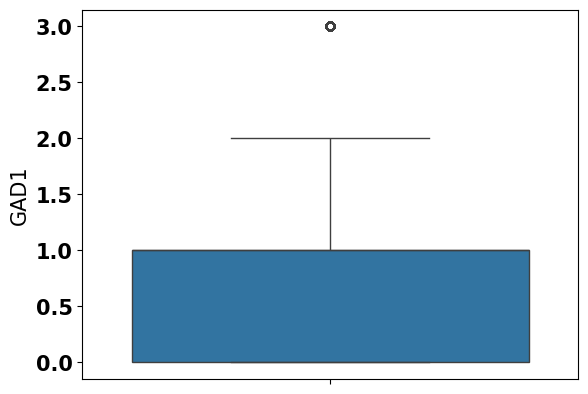

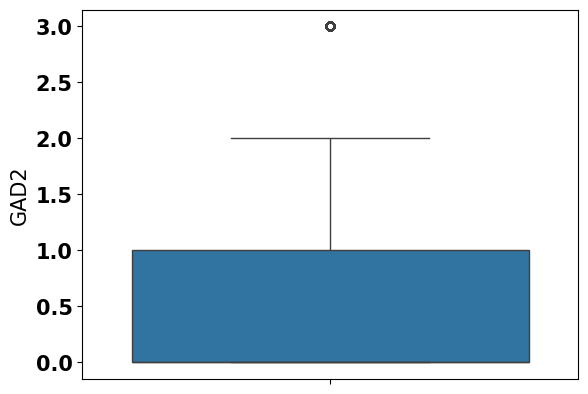

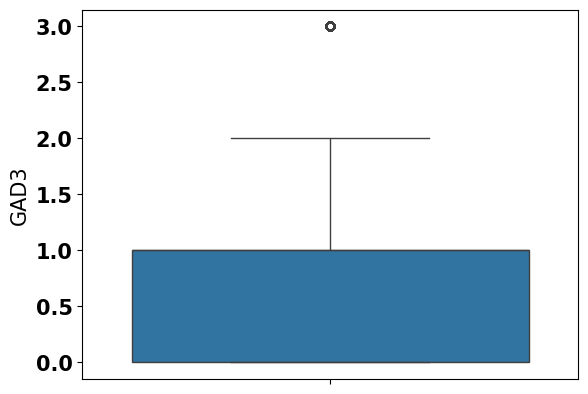

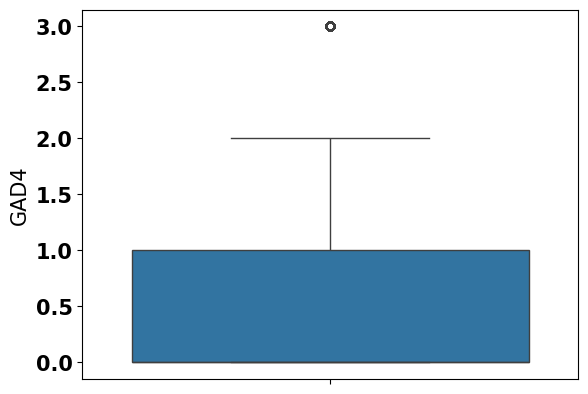

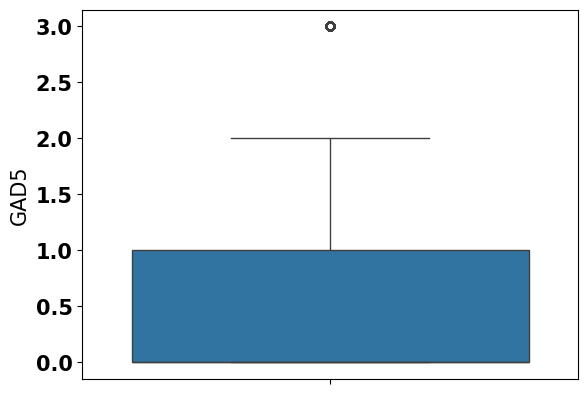

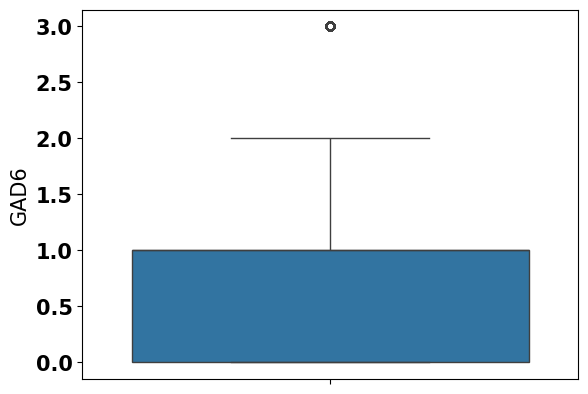

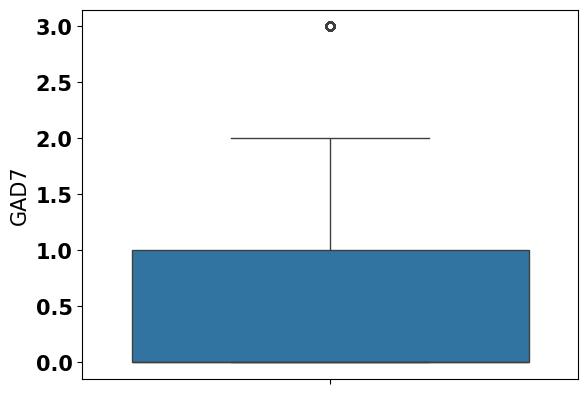

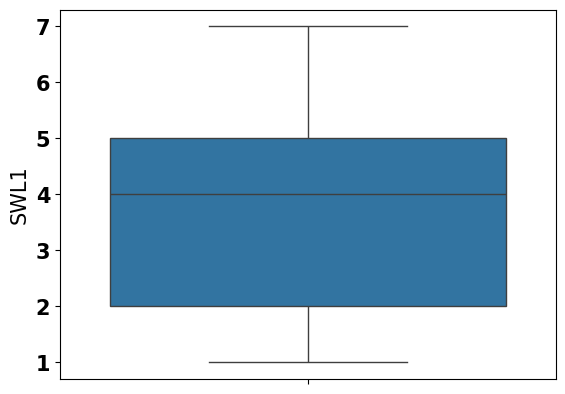

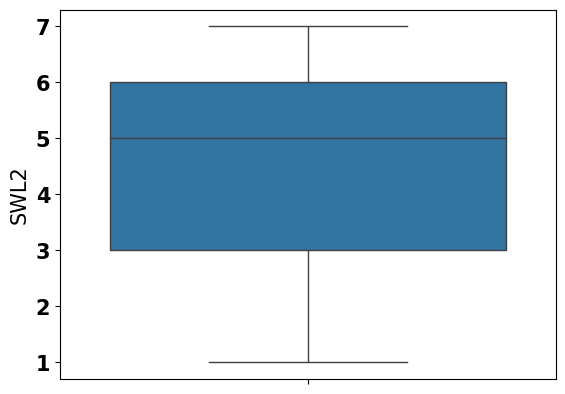

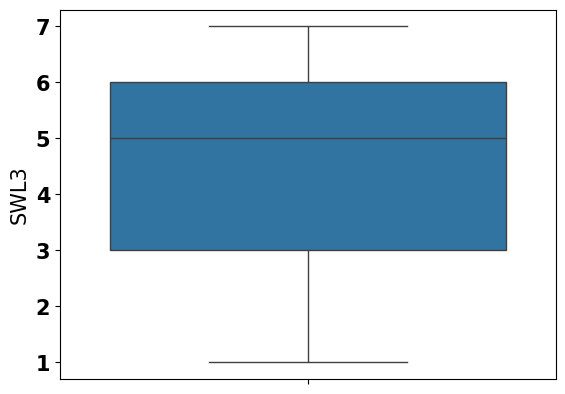

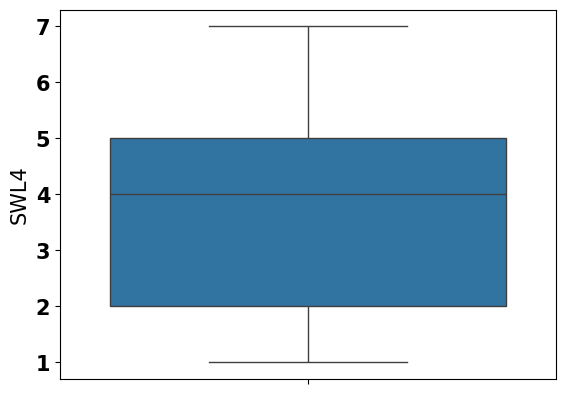

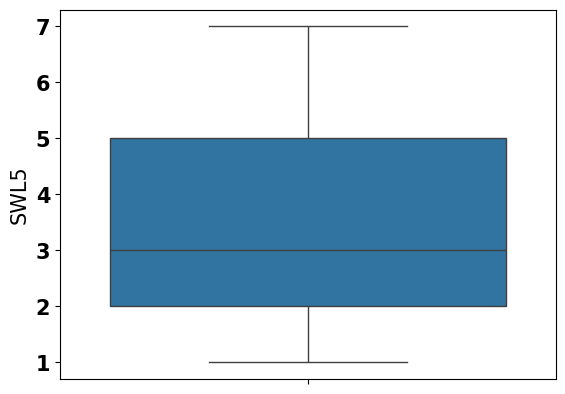

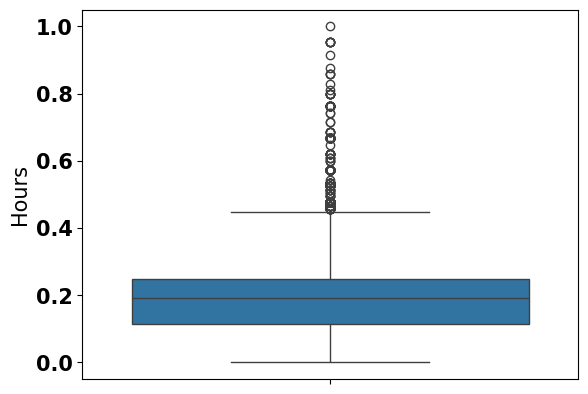

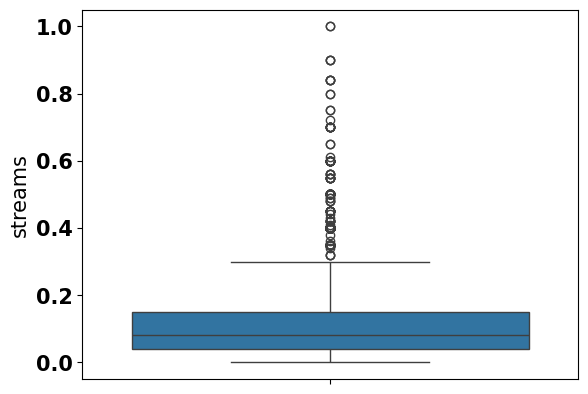

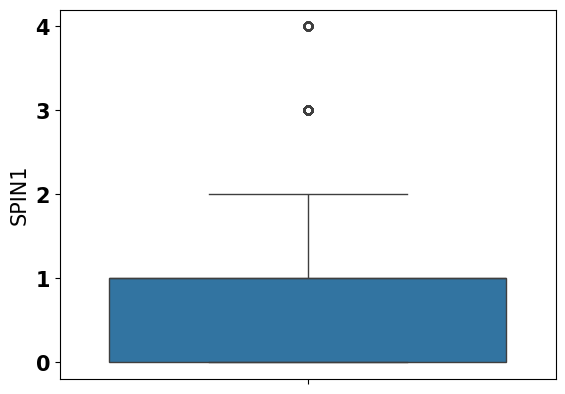

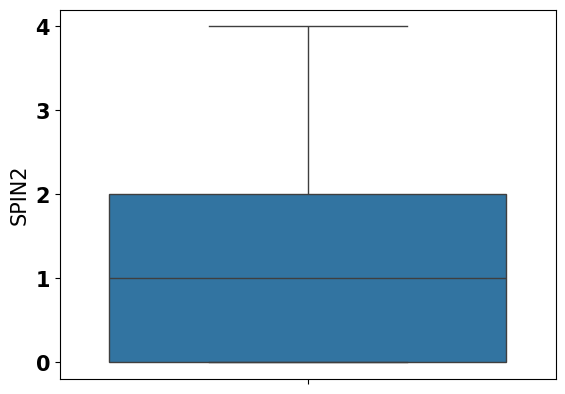

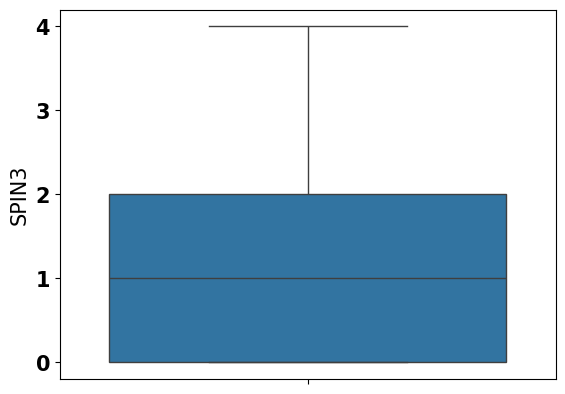

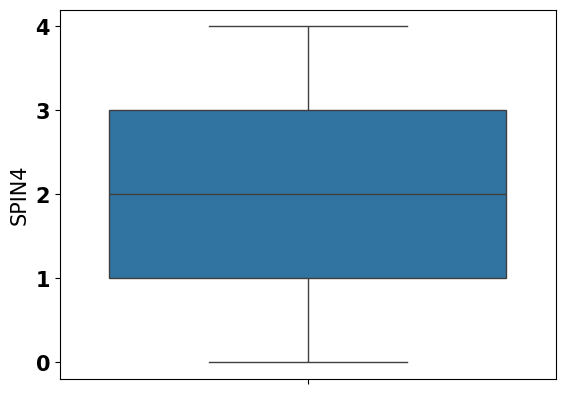

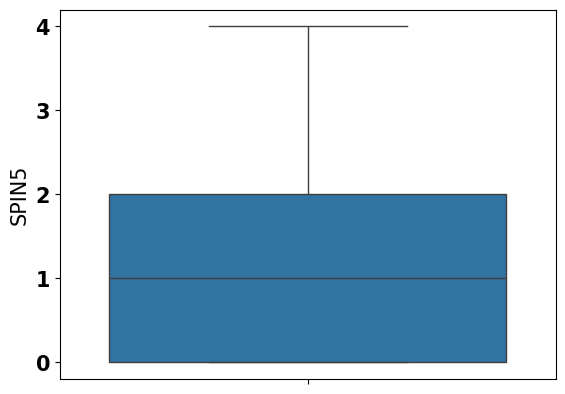

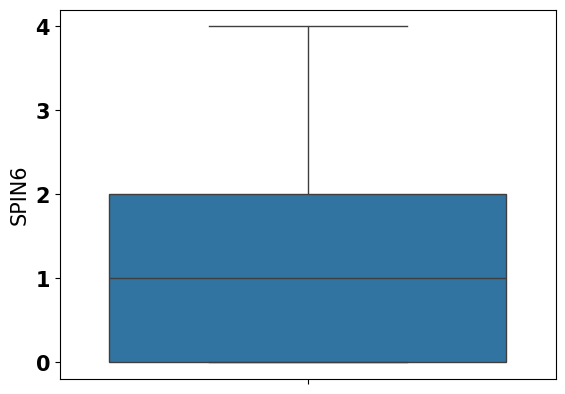

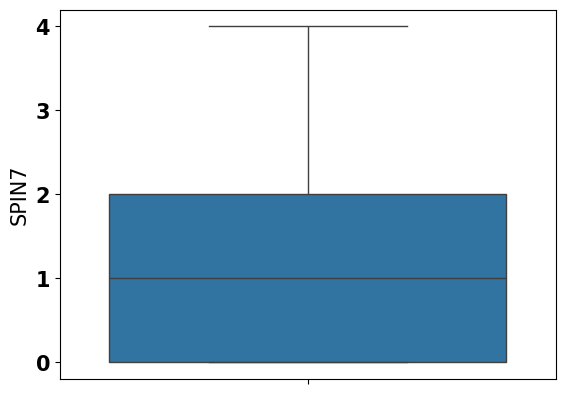

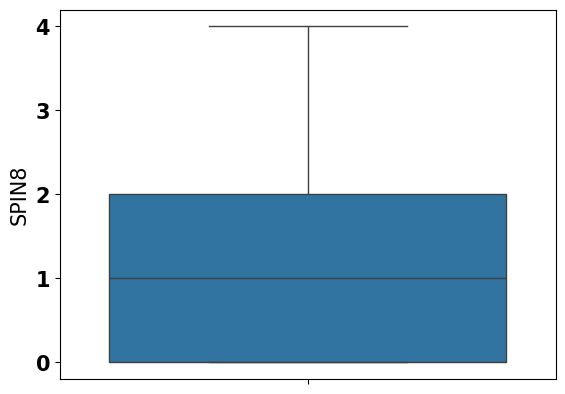

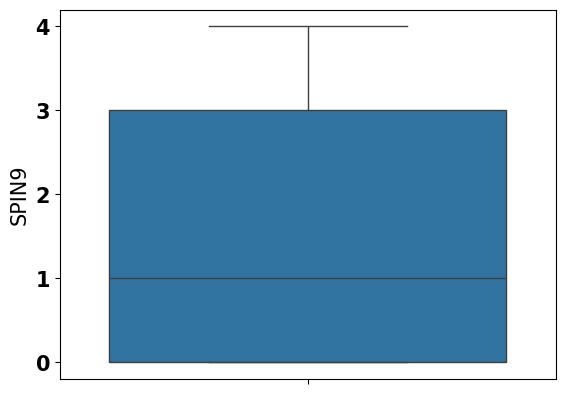

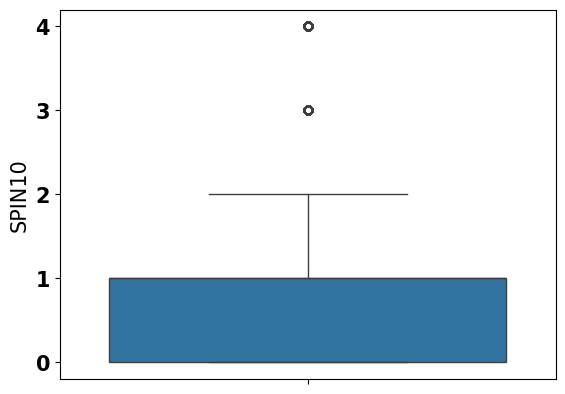

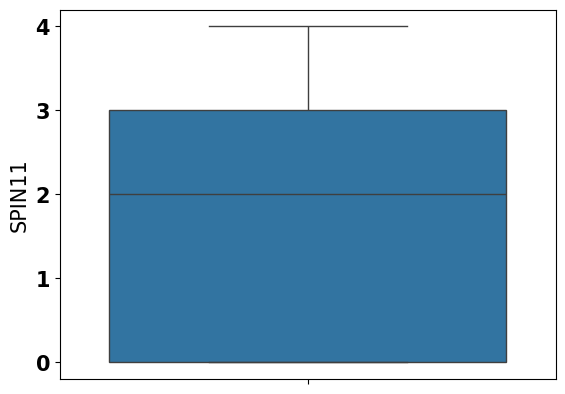

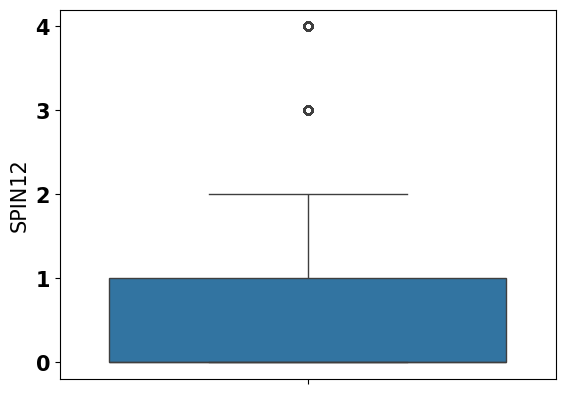

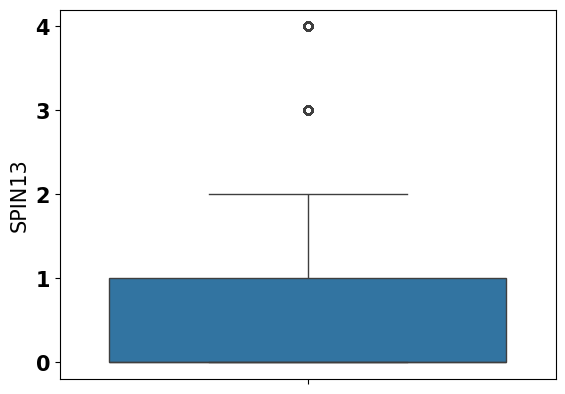

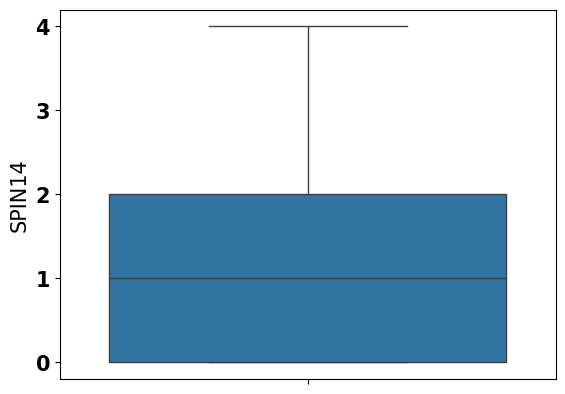

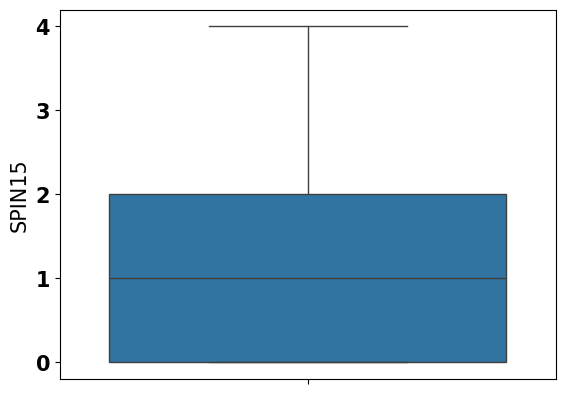

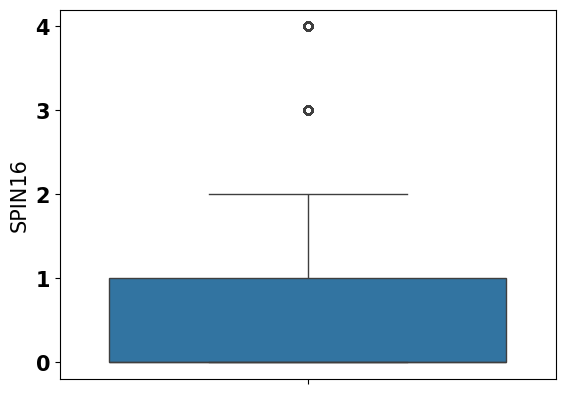

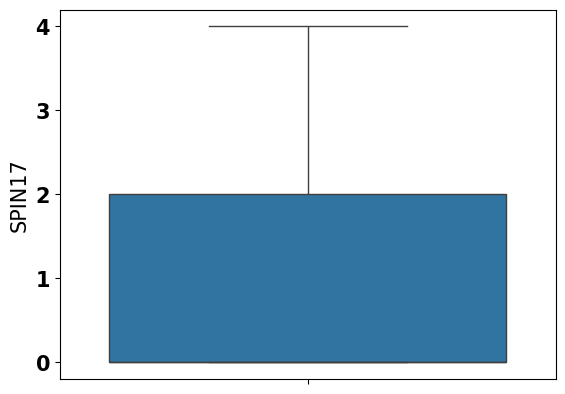

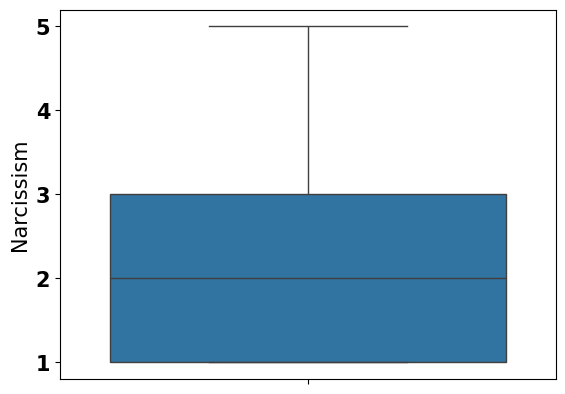

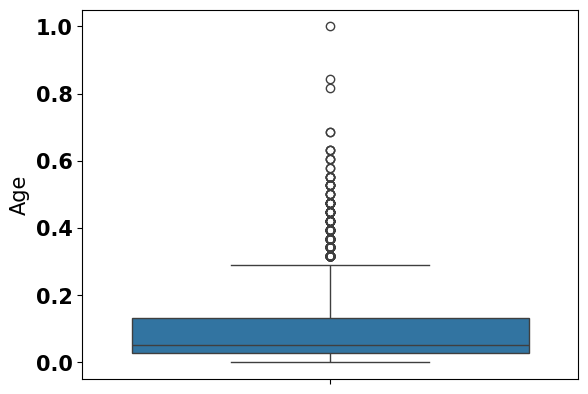

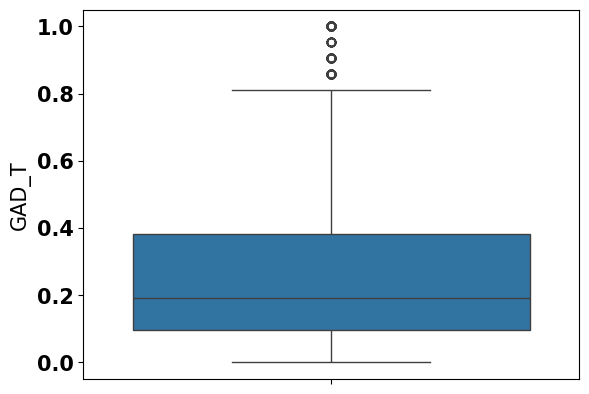

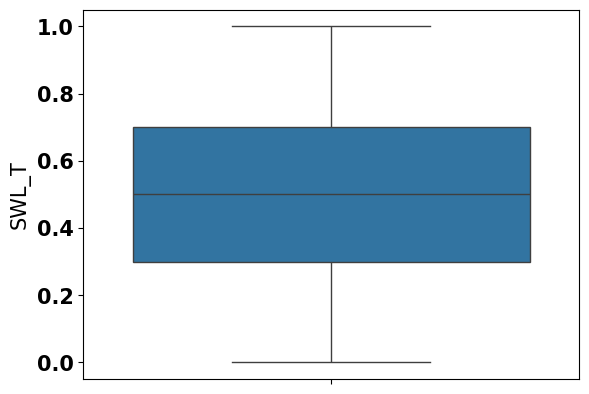

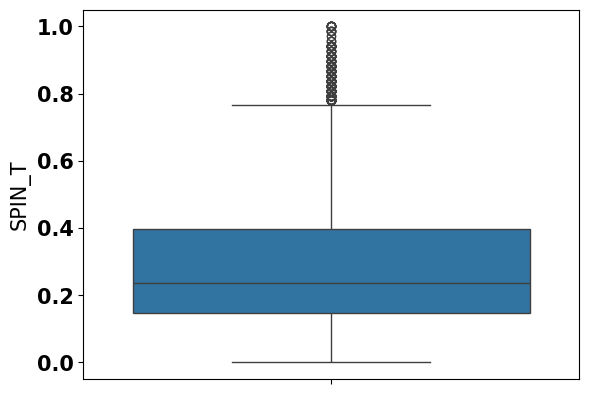

In [ ]:
for i in df:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.show()

In [ ]:
df.drop( df[df['Age'] > 50].index , axis = 0 , inplace=True)

Scores distribution

Line plot Anxities vs hours played , watched

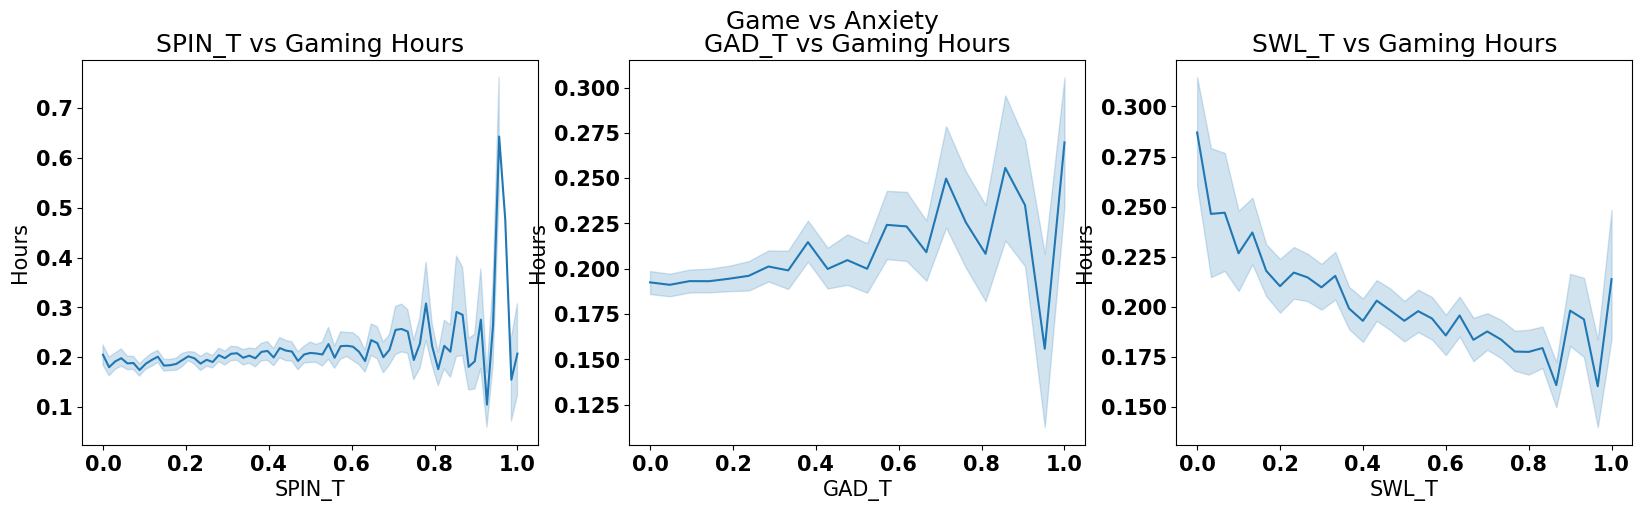

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="Hours", data=df , ax = axes[count])
    axes[count].set_title(f"{ele} vs Gaming Hours")


Game played vs Total scored

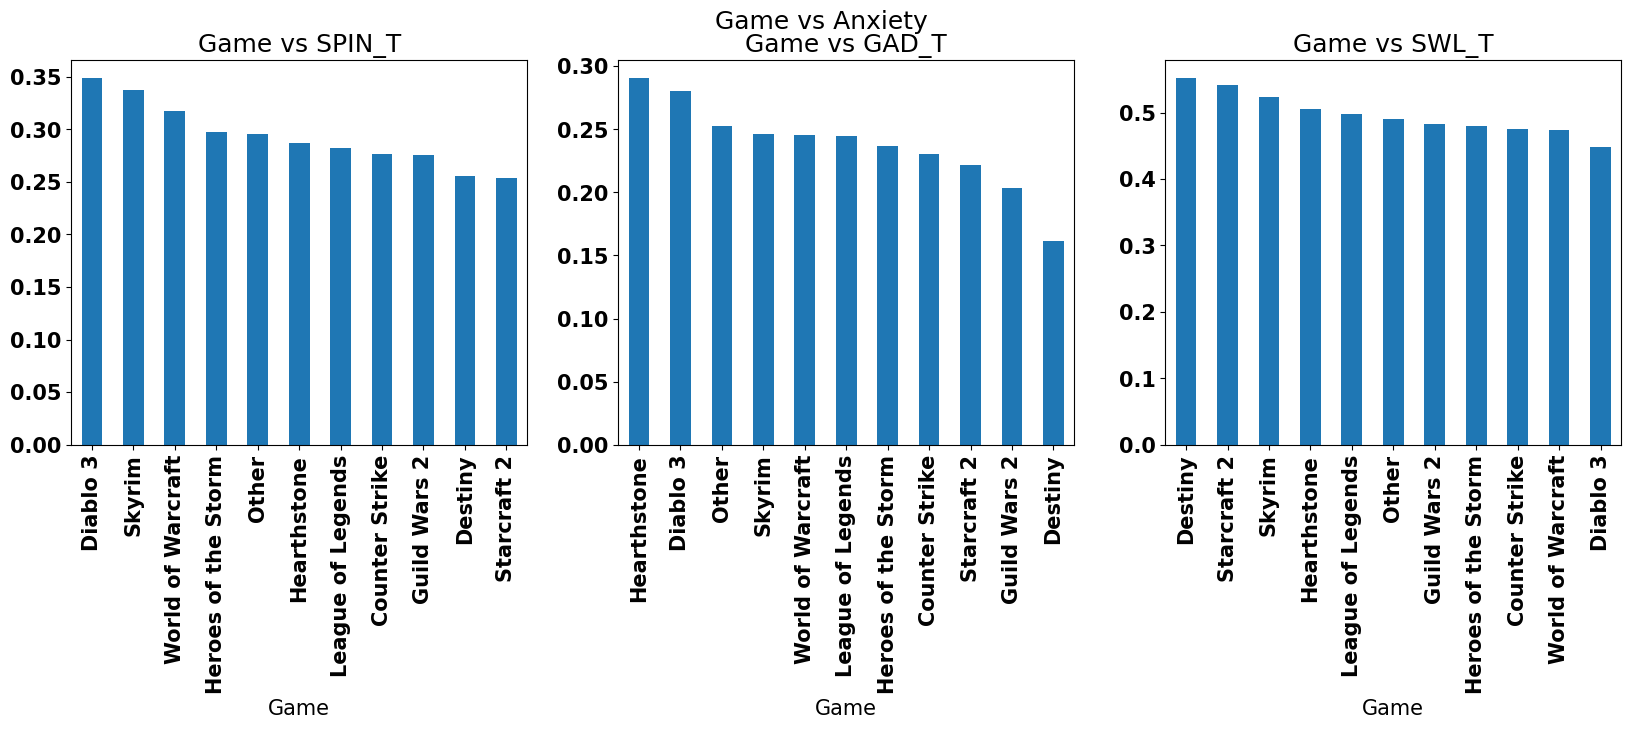

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    df.groupby('Game')[ele].mean().sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Game vs {ele}")


Residence vs Scores

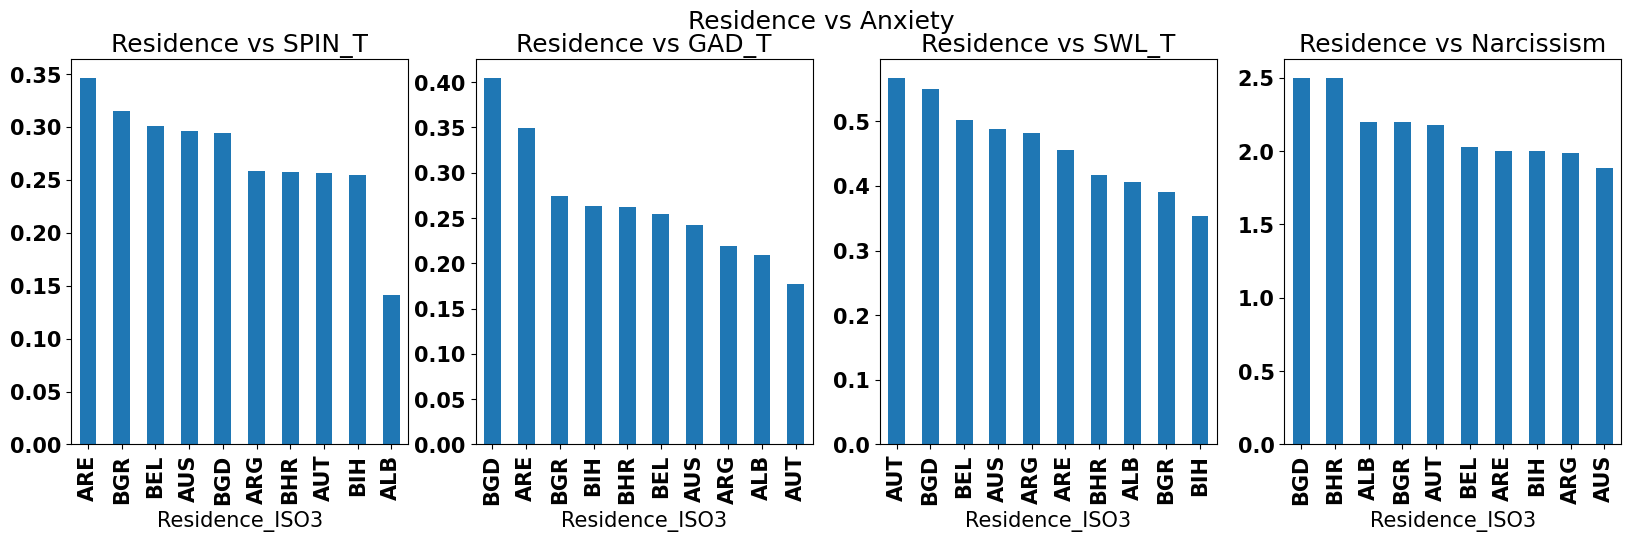

In [ ]:
fig, axes = plt.subplots(1 , 4, figsize=(20, 5) )
fig.suptitle('Residence vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T' , 'Narcissism']

for count, ele in enumerate(labels):
    df.groupby('Residence_ISO3')[ele].mean().head(10).sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Residence vs {ele}")

OTHER EDA

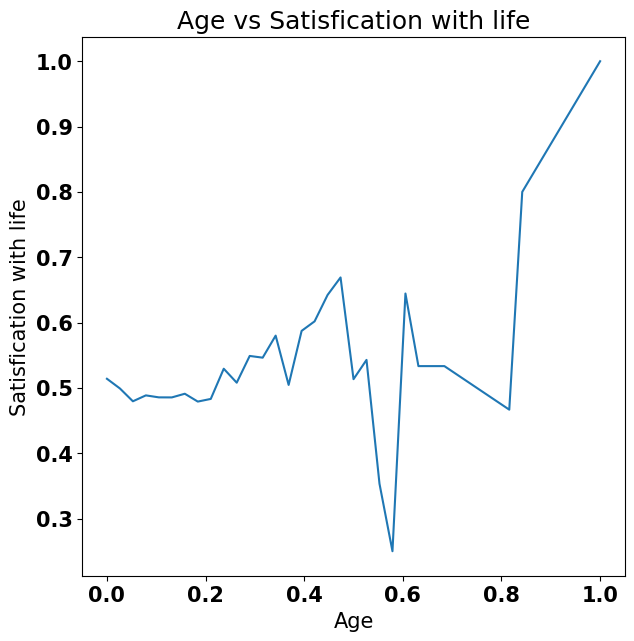

In [ ]:
plt.figure(figsize=(7,7))
df.groupby('Age')['SWL_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

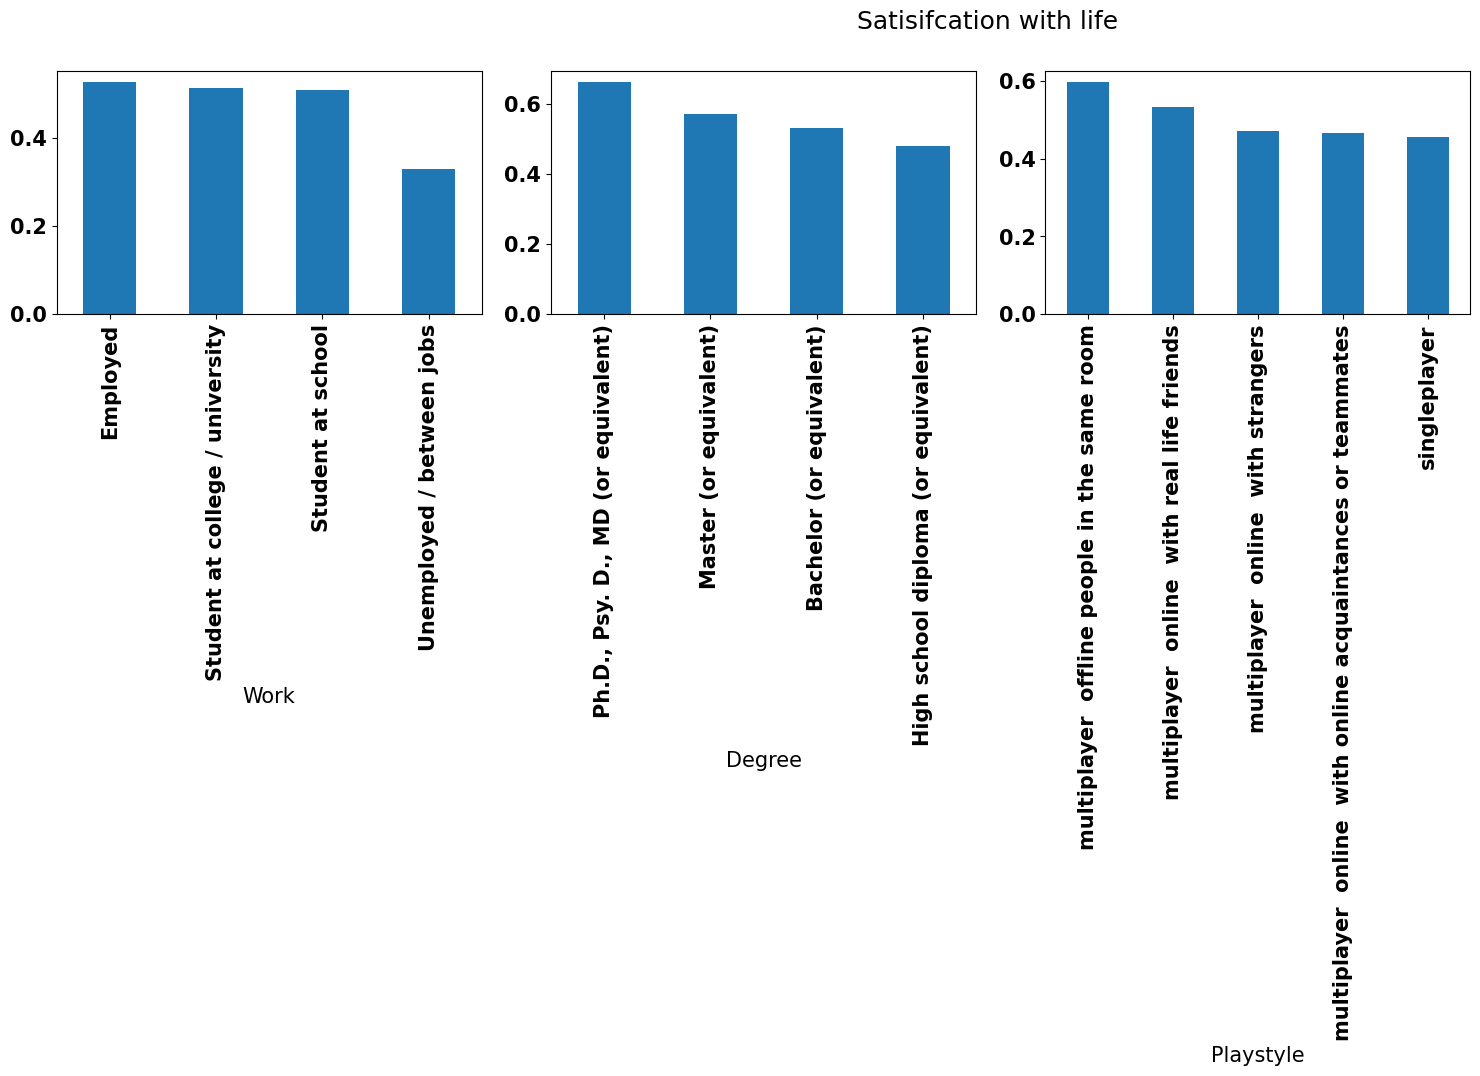

In [ ]:
labels = ['Work', 'Degree' , 'Playstyle']
plt.figure(figsize=(20,8))
plt.suptitle('Satisifcation with life')
for count, ele in enumerate(labels,1):
    plt.subplot(1 , 4 , count)
    plt.tight_layout()
    df.groupby(ele)['SWL_T'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

LABEL ENCODING

In [ ]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,1,3,5,...,1,0.184211,3,0,2,4,0.047619,0.600000,0.073529,100
1,1,2,2,2,0,1,0,2,3,5,...,1,0.605263,3,0,2,3,0.380952,0.366667,0.485294,100
3,0,0,0,0,0,0,0,1,2,5,...,1,0.263158,0,0,2,1,0.000000,0.400000,0.161765,100
4,2,1,2,2,2,3,2,3,2,2,...,1,0.026316,0,1,2,3,0.666667,0.300000,0.191176,54
5,0,0,0,0,0,1,0,1,3,5,...,1,0.157895,0,0,2,2,0.047619,0.400000,0.191176,100


FEATURE ENGINEERING

In [ ]:
df1 = df[['GAD_T'  , 'SWL_T' , 'SPIN_T' ]]
df2 = df[[ 'Age' ,  'Hours' , 'streams' ]]
pc1 = PCA(n_components=2)
pc2 = PCA(n_components=2)
x1 = pc1.fit_transform(df1)
x2 = pc2.fit_transform(df2)
x = x1 + x2

Elbow method to determine no. of clusters

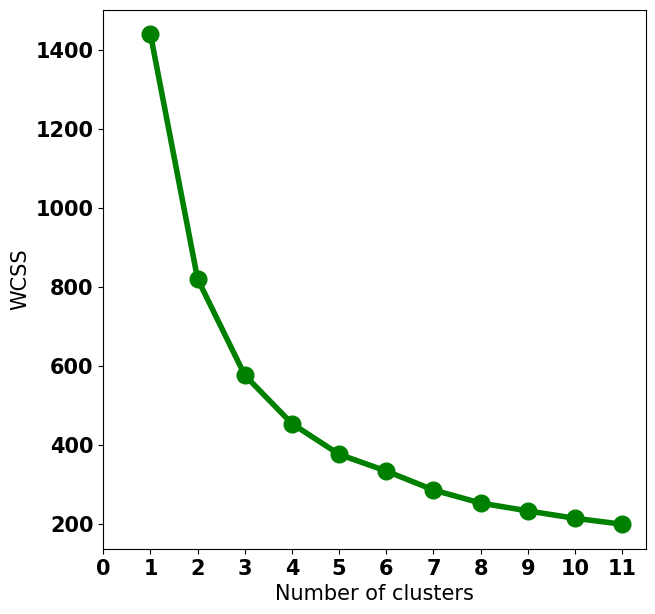

In [ ]:
WCSS = []
for i in range(1,12):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_) #inertia --> error
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,12),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(12))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

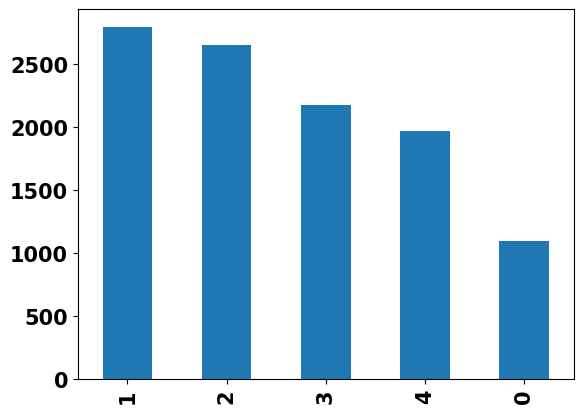

In [ ]:
#clustering 3 different groups
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 40, random_state = 0)
y_clusters = model.fit_predict(x)
pd.Series(y_clusters).value_counts().plot(kind='bar');

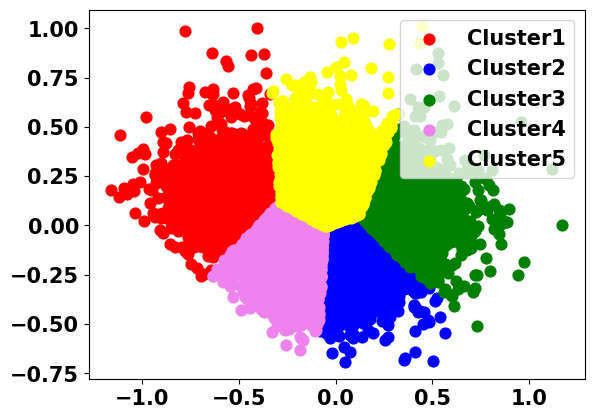

In [ ]:
plt.scatter(x[y_clusters == 0, 0], x[y_clusters == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_clusters == 1, 0], x[y_clusters == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_clusters == 2, 0], x[y_clusters == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(x[y_clusters == 3, 0], x[y_clusters == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(x[y_clusters == 4, 0], x[y_clusters == 4, 1], s = 60, c = 'yellow', label = 'Cluster5')

plt.legend()
plt.show()

In [ ]:
df['Label'] = y_clusters

In [ ]:
#checking if data is unbalanced
plt.rcParams.update({'font.size': 12})
df['Label'].value_counts()

,count
Label,
1,2799
2,2651
3,2178
4,1972
0,1098


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Splitting data to train and test

In [ ]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=.8,random_state=44)

Random forest clustering model

In [ ]:
clf = RandomForestClassifier(n_estimators = 1000 , random_state=44, max_depth=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.8023364485981308

In [ ]:
clf.score(X_train,y_train)

0.8596634727740127

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       181
           1       0.82      0.78      0.80       577
           2       0.86      0.86      0.86       520
           3       0.83      0.75      0.79       507
           4       0.71      0.81      0.76       355

    accuracy                           0.80      2140
   macro avg       0.79      0.81      0.80      2140
weighted avg       0.81      0.80      0.80      2140



In [ ]:
confusion_matrix(y_pred,y_test)

array([[156,   0,   0,  13,  12],
       [  0, 448,  49,  49,  31],
       [  0,  39, 449,   0,  32],
       [ 39,  49,   2, 378,  39],
       [ 18,  13,  24,  14, 286]])